In [100]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np

In [101]:
coordinate_source = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')

In [102]:
r = coordinate_source.json()['l']
r

[{'st': [{'rs': '270 684|270 684',
    'udpx': '270 687;270 681',
    'su': '1',
    'udsu': '1;1',
    'n': '金安桥',
    'sid': '110100023339035',
    'p': '270 684',
    'r': '900000069871|110100023339',
    'udsi': '900000069872015;900000069871002',
    't': '1',
    'si': '110100023339035',
    'sl': '116.163167,39.923620',
    'udli': '900000069872;900000069871',
    'poiid': 'BV10813545',
    'lg': '0',
    'sp': 'jin an qiao'},
   {'rs': '226 684',
    'udpx': '226 681;226 687',
    'su': '1',
    'udsu': '1;1',
    'n': '四道桥',
    'sid': '900000069871003',
    'p': '226 684',
    'r': '900000069871',
    'udsi': '900000069871003;900000069872014',
    't': '0',
    'si': '900000069871003',
    'sl': '116.134010,39.916030',
    'udli': '900000069871;900000069872',
    'poiid': 'BV10813547',
    'lg': '0',
    'sp': 'si dao qiao'},
   {'rs': '181 684',
    'udpx': '180 681;180 687',
    'su': '1',
    'udsu': '1;1',
    'n': '桥户营',
    'sid': '900000069871004',
    'p': '181 684',
 

# 获取数据

In [103]:
def get_line_station_info(text):
    line_info= []
    station_info = {}
    
    for i in range(len(text)):
        this_line_info = {}
        # 线路名称
        line_name_pattern = re.compile("\'ln\':.\'(\w+)\'\,")
        this_line = line_name_pattern.findall(str(text[i]))
        
        # 这条线路下的站名
        station_name_pattern = r"\'n\':.\'(\w+)\',"
        station_name = re.findall(station_name_pattern,str(text[i]))
        
        this_line_info[this_line[0]] = station_name
        
        line_info.append(this_line_info)
        
        # 这条线路线站的坐标
        station_position_pattern = r"\'p\':.\'(\d+.?\d+)\',"
        station_position = re.findall(station_position_pattern,str(text[i]))

        for j in range(len(station_position)):
            
            # 站的坐标改为元组形式
            station_position[j] = tuple(map(float,station_position[j].split(' ')))
            
            station_info[station_name[j]] = station_position[j]
        
    return (line_info,station_info)

In [104]:
line_info,station_info = get_line_station_info(r)

In [105]:
station_info

{'金安桥': (270.0, 684.0),
 '四道桥': (226.0, 684.0),
 '桥户营': (181.0, 684.0),
 '上岸': (155.0, 711.0),
 '栗园庄': (155.0, 735.0),
 '小园': (131.0, 758.0),
 '石厂': (104.0, 758.0),
 '苹果园': (312.0, 684.0),
 '古城': (334.0, 720.0),
 '八角游乐园': (391.0, 720.0),
 '八宝山': (454.0, 720.0),
 '玉泉路': (505.0, 720.0),
 '五棵松': (555.0, 720.0),
 '万寿路': (603.0, 720.0),
 '公主坟': (650.0, 720.0),
 '军事博物馆': (710.0, 720.0),
 '木樨地': (769.0, 720.0),
 '南礼士路': (819.0, 720.0),
 '复兴门': (858.0, 720.0),
 '西单': (928.0, 720.0),
 '天安门西': (972.0, 720.0),
 '天安门东': (1031.0, 720.0),
 '王府井': (1080.0, 720.0),
 '东单': (1116.0, 720.0),
 '建国门': (1179.0, 720.0),
 '永安里': (1247.0, 720.0),
 '国贸': (1279.0, 720.0),
 '大望路': (1337.0, 720.0),
 '四惠': (1374.0, 724.0),
 '四惠东': (1409.0, 724.0),
 '积水潭': (905.0, 555.0),
 '鼓楼大街': (1002.0, 555.0),
 '安定门': (1077.0, 555.0),
 '雍和宫': (1116.0, 555.0),
 '东直门': (1179.0, 586.0),
 '东四十条': (1179.0, 628.0),
 '朝阳门': (1179.0, 659.0),
 '北京站': (1171.0, 759.0),
 '崇文门': (1116.0, 764.0),
 '前门': (1045.0, 764.0),
 '和平门': (999.0, 764.0)

In [106]:
len(station_info)

340

# 根据线路信息，建立站点邻接表dict

In [107]:
line_info

[{'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂']},
 {'1号线': ['苹果园',
   '古城',
   '八角游乐园',
   '八宝山',
   '玉泉路',
   '五棵松',
   '万寿路',
   '公主坟',
   '军事博物馆',
   '木樨地',
   '南礼士路',
   '复兴门',
   '西单',
   '天安门西',
   '天安门东',
   '王府井',
   '东单',
   '建国门',
   '永安里',
   '国贸',
   '大望路',
   '四惠',
   '四惠东']},
 {'2号线': ['积水潭',
   '鼓楼大街',
   '安定门',
   '雍和宫',
   '东直门',
   '东四十条',
   '朝阳门',
   '建国门',
   '北京站',
   '崇文门',
   '前门',
   '和平门',
   '宣武门',
   '长椿街',
   '复兴门',
   '阜成门',
   '车公庄',
   '西直门']},
 {'4号线大兴线': ['天宫院',
   '生物医药基地',
   '义和庄',
   '黄村火车站',
   '黄村西大街',
   '清源路',
   '枣园',
   '高米店南',
   '高米店北',
   '西红门',
   '新宫',
   '公益西桥',
   '角门西',
   '马家堡',
   '北京南站',
   '陶然亭',
   '菜市口',
   '宣武门',
   '西单',
   '灵境胡同',
   '西四',
   '平安里',
   '新街口',
   '西直门',
   '动物园',
   '国家图书馆',
   '魏公村',
   '人民大学',
   '海淀黄庄',
   '中关村',
   '北京大学东门',
   '圆明园',
   '西苑',
   '北宫门',
   '安河桥北']},
 {'5号线': ['宋家庄',
   '刘家窑',
   '蒲黄榆',
   '天坛东门',
   '磁器口',
   '崇文门',
   '东单',
   '灯市口',
   '东四',
   '张自忠路',
   '北新桥',
   '雍和宫',
   '和平里

In [83]:
from collections import defaultdict

In [127]:
def get_neighbor_info(lines_info):
    neighbor_info = defaultdict(list)
    
    for num in range(len(lines_info)):
        stations = list(lines_info[num].values())[0]
        for station1 in stations:
                 for station2 in stations:
                        if station1 == station2: continue
                        if abs(stations.index(station1)-stations.index(station2))==1:
                            neighbor_info[station1].append(station2)

    # 把str2加入str1站点的邻接表中
#     def add_neighbor_dict(info, str1, str2):
#         # 请在这里写代码
#         pass
        
    return neighbor_info

In [128]:
stations_connections = get_neighbor_info(line_info)
stations_connections

defaultdict(list,
            {'金安桥': ['四道桥', '杨庄'],
             '四道桥': ['金安桥', '桥户营'],
             '桥户营': ['四道桥', '上岸'],
             '上岸': ['桥户营', '栗园庄'],
             '栗园庄': ['上岸', '小园'],
             '小园': ['栗园庄', '石厂'],
             '石厂': ['小园'],
             '苹果园': ['古城'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
      

# 画站图

In [78]:
import networkx as nx
plt.rcParams['font.sans-serif'] = ['SimHei']

In [79]:
station_info.keys()

dict_keys(['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂', '苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '阜成门', '车公庄', '西直门', '天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '灵境胡同', '西四', '平安里', '新街口', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北', '宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '灯市口', '东四', '张自忠路', '北新桥', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北', '潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '南锣鼓巷', '北海北', '车公庄西', '白石桥南', '花园桥', '慈寿寺', '海淀五路居', '田村', '廖公庄', '西黄村', '杨庄', '花庄', '高楼金', '群芳', '万盛东', '万盛西', '黑庄户', '郎辛庄', '黄厂', '焦化厂', '双合', '垡头', '欢乐谷景区'

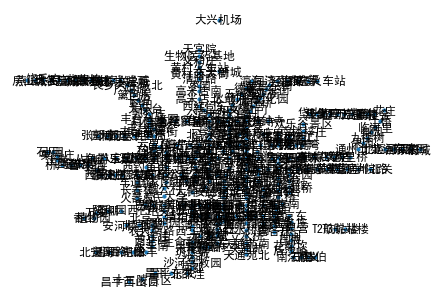

In [132]:
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_info.keys()))
nx.draw(station_graph,station_info,with_labels = True,node_size = 10)

# 画联系图

In [129]:
stations_connections_graph = nx.Graph(stations_connections)

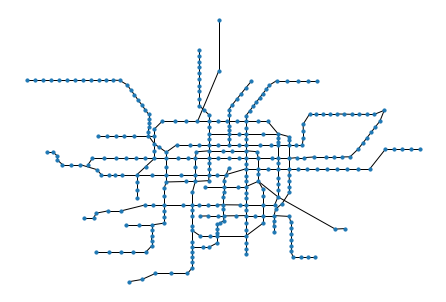

In [131]:
nx.draw(stations_connections_graph,station_info,with_labels=False,node_size=10)

# 查找路径

In [136]:
def search_BFS(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successsors = graph[froniter]
        
        for station in successsors:
            if station in path: continue  # check loop
            
            new_path = path+[station]
            
            pathes.append(new_path)  #bfs
            #pathes = [new_path] + pathes #dfs
            
            if station == destination:
                return new_path
        visited.add(froniter)

In [137]:
search_BFS(stations_connections,"金安桥","八宝山")

['金安桥',
 '杨庄',
 '西黄村',
 '廖公庄',
 '田村',
 '海淀五路居',
 '慈寿寺',
 '西钓鱼台',
 '公主坟',
 '万寿路',
 '五棵松',
 '玉泉路',
 '八宝山']